### Logistic regression with for loops

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm


In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [5]:
data.Age = data.Age.fillna(data.Age.mean())

In [57]:
def sigmoid(feature_vector, weights, bias_unit_weight):
    
    '''
    takes in vector of feature values and vector of weights and computes output from logistic function
    
    '''
    
    products = []
    new_weights = [c for c in weights if c != 'bias_unit']
    
    for value, weight in zip(feature_vector, new_weights):
        products.append(value*weight)
        
    linear_combination = sum(products) + bias_unit_weight
    
    function_output = 1 / (1+np.exp(-linear_combination))
    
    return(function_output)
    



In [94]:
def logisticRegression(data, x_cols, y_col, alpha = 0.05, totalIterations=100):

    
################################################################## initialise dictionaries    
    dw_vect = {}
    old_params = {}
    new_params = {}
    param_mapping = {}
    bias_unit = 0
    error_vect = []
    loss_function_values = []
    cost_function_values =[]
################################################################## initialise dictionaries 

    
################################################################## set up dictionaries
    for i in x_cols:
        old_params[i] = 0
        new_params[i] = 0
        dw_vect[i] = 0
        
        
    old_params['bias_unit'] = 0
    new_params['bias_unit'] = 0
    param_mapping['bias_unit'] = 0
    dw_vect['bias_unit'] = 0
    
    for count, i_2 in enumerate(old_params.keys()):
        param_mapping[i_2] = count

################################################################## set up dictionaries



################################################################## loop through data 
    for counter in tqdm(range(totalIterations)):
        
        #reset dw to zeros
        for i in x_cols:
            dw_vect[i] = 0
            dw_vect['bias_unit'] = 0

        #update old paramaters with new paramaters defined from previous iteration
        old_params = new_params.copy()

        for i in x_cols:
            new_params[i] = 0
        
        for row_number in range(data.shape[0]):
################################################################## loop through data


################################################################## loop through each row of data

            #loops through data and stores the feature vector and label
            feature_vector = list(data.iloc[row_number][x_cols])
            y = data.iloc[row_number][y_col]

            #(a-y)
            bias_unit_sigmoid_result = sigmoid(feature_vector, list(old_params.values()), old_params['bias_unit'])
            dw_vect['bias_unit'] = dw_vect['bias_unit'] + ((bias_unit_sigmoid_result)-y)






            #loop through the weights and put all into new list except bias weight
            feat_weights = [c for c in old_params.keys() if c != 'bias_unit']
################################################################## loop through each row of data

################################################################## loop through feature weights
            for param in feat_weights:

                #use the weight to look up the associated x value
                x_value = feature_vector[param_mapping[param]]


                #compute the error between the predicted and actual

                sigmoid_output= sigmoid(feature_vector, list(old_params.values()), old_params['bias_unit'])




                error = sigmoid_output-y

                #mulitiply the error by the x value, eg x(a-y)

                dw_vect[param] = dw_vect[param] + (x_value*error)



                #update paramater
                #***updated_param = old_params[param]-(alpha*dw)
                #***new_params[param] = updated_param
################################################################## loop through feature weights

################################################################## record new bias unit value and record loss function
            
            sigmoid_output_assess = sigmoid(feature_vector, list(old_params.values()), old_params['bias_unit'])

            loss_function_output = -(y*(np.log(sigmoid_output_assess))+((1-y)*np.log(1-sigmoid_output_assess)))
            loss_function_values.append(loss_function_output)
            
################################################################## record new bias unit value and record loss function  


################################################################## update feature weights
        for paramater in old_params.keys():    

            updated_param = old_params[param]-(alpha*(dw_vect[paramater]/data.shape[0]))
            new_params[paramater] = updated_param
################################################################## update feature weights


################################################################## update bias unit weight
        updated_bias_unit = old_params['bias_unit']-(alpha*(dw_vect['bias_unit']/data.shape[0]))
        new_params['bias_unit'] =updated_bias_unit
################################################################## update bias unit weight


################################################################## record cost function
        cost_function_values.append(sum(loss_function_values)/data.shape[0])
        loss_function_values =[]
################################################################## record cost function


    return(new_params, cost_function_values)





In [97]:
weights, errors = logisticRegression(data = data, x_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], y_col='Survived', alpha = 0.001, totalIterations=1000)





  0%|          | 0/1000 [00:00<?, ?it/s]



  0%|          | 1/1000 [00:00<14:42,  1.13it/s]



  0%|          | 2/1000 [00:01<15:06,  1.10it/s]



  0%|          | 3/1000 [00:02<15:28,  1.07it/s]



  0%|          | 4/1000 [00:03<15:31,  1.07it/s]



  0%|          | 5/1000 [00:04<15:32,  1.07it/s]



  1%|          | 6/1000 [00:05<15:35,  1.06it/s]



  1%|          | 7/1000 [00:06<15:33,  1.06it/s]



  1%|          | 8/1000 [00:07<15:33,  1.06it/s]



  1%|          | 9/1000 [00:08<15:43,  1.05it/s]



  1%|          | 10/1000 [00:09<15:46,  1.05it/s]



  1%|          | 11/1000 [00:10<15:44,  1.05it/s]



  1%|          | 12/1000 [00:11<15:38,  1.05it/s]



  1%|▏         | 13/1000 [00:12<15:37,  1.05it/s]



  1%|▏         | 14/1000 [00:13<15:34,  1.05it/s]



  2%|▏         | 15/1000 [00:14<15:31,  1.06it/s]



  2%|▏         | 16/1000 [00:15<15:28,  1.06it/s]



  2%|▏         | 17/1000 [00:16<15:26,  1.06it/s]



  2%|▏         | 18/1000 [00:17<15:25,  1.06it/s]



  2%|▏ 

In [74]:
weights

{'Pclass': -0.01943230567439814,
 'Age': 0.060687417048548284,
 'SibSp': -0.022790048744480255,
 'Parch': -0.022532782088496614,
 'Fare': 0.14128887025854764,
 'bias_unit': -0.17029213600071202}

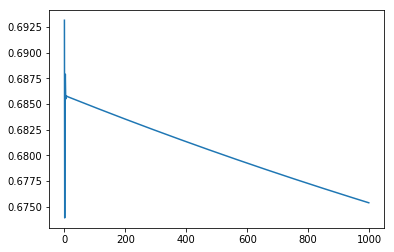

In [98]:
a = pd.Series(errors)


%matplotlib inline

a.plot()

In [99]:
errors

[0.6931471805599373,
 0.6739079228715307,
 0.6862552364058215,
 0.6878974419359202,
 0.6858187763496453,
 0.6855027119859487,
 0.6857540344501287,
 0.6857868178941028,
 0.685739983902911,
 0.6857215547337077,
 0.6857143365696311,
 0.6857034749398746,
 0.6856910452957267,
 0.6856790850501149,
 0.6856673473531847,
 0.6856555534009827,
 0.6856437319161479,
 0.6856319209623891,
 0.6856201172927383,
 0.685608315721304,
 0.6855965165990175,
 0.6855847206297514,
 0.685572927777005,
 0.6855611379443995,
 0.6855493511343191,
 0.6855375673588705,
 0.6855257866170161,
 0.6855140089061924,
 0.6855022342255737,
 0.6854904625745728,
 0.6854786939523768,
 0.6854669283581303,
 0.6854551657910113,
 0.6854434062502062,
 0.6854316497348915,
 0.6854198962442472,
 0.6854081457774581,
 0.6853963983336986,
 0.6853846539121534,
 0.685372912512002,
 0.6853611741324233,
 0.6853494387726021,
 0.6853377064317179,
 0.6853259771089539,
 0.6853142508034903,
 0.6853025275145105,
 0.6852908072411968,
 0.68527908998273

[0.5,
 1.4,
 2.7,
 1.2,
 -4.283884935576768,
 -31.515291388987016,
 -2.9900028352435997,
 -0.0,
 13.802530472238837,
 -4.283884935576768,
 -31.515291388987016,
 -2.9900028352435997,
 -0.0,
 13.802530472238837,
 -1.4279616451922559,
 -54.4355033082503,
 -2.9900028352435997,
 -0.0,
 135.70895453955072,
 -4.283884935576768,
 -37.24534436880284,
 -0.0,
 -0.0,
 15.087593654136935,
 -1.4279616451922559,
 -50.13796357338843,
 -2.9900028352435997,
 -0.0,
 101.09163697598376,
 -4.283884935576768,
 -50.13796357338843,
 -0.0,
 -0.0,
 15.325568317451399,
 -4.283884935576768,
 -42.54437939285751,
 -0.0,
 -0.0,
 16.10288875770176,
 -1.4279616451922559,
 -77.35571522751358,
 -0.0,
 -0.0,
 98.73568780917057,
 -4.283884935576768,
 -2.8650264899079105,
 -8.9700085057308,
 -0.5602473341592771,
 40.12252823481841,
 -4.283884935576768,
 -38.67785761375679,
 -0.0,
 -1.1204946683185542,
 21.19554655263126,
 -2.8559232903845118,
 -20.055185429355372,
 -2.9900028352435997,
 -0.0,
 57.24870804477236,
 -4.283884

In [46]:
def predict(data, X_cols, weights, bias_unit_weight):
    results = []
    weight_vect =[]
    featWeight_products = []
    for i in weights:
        if i != 'bias_unit':
            weight_vect.append(weights[i])

    for row_number in range(data.shape[0]):

        
        input_vector = list(data.iloc[row_number][X_cols])

        
        print(input_vector)
        print(weight_vect)
        for value, weight in zip(input_vector, weight_vect):
            featWeight_products.append(value*weight)

        linear_combination = sum(featWeight_products) + bias_unit_weight


        function_output = 1/(1+np.exp(-linear_combination))

        results.append(function_output)
    
    return(results)
    

    
def sigmoid(feature_vector, weights, bias_unit_weight):
    
    '''
    takes in vector of feature values and vector of weights and computes output from logistic function
    
    '''
    
    products = []
    weights = [c for c in weights if c != 'bias_unit']
    
    for value, weight in zip(feature_vector, weights):
        products.append(value*weight)
        
    linear_combination = sum(products) + bias_unit_weight
    
    function_output = 1 / (1+np.exp(-linear_combination))
    
    return(function_output, linear_combination)

In [276]:
weights

{'Pclass': 0.008736834428405485,
 'Age': -0.009686411772832455,
 'SibSp': 0.01033158992304064,
 'Parch': 0.010729396188888345,
 'Fare': 0.01066156477793752,
 'bias_unit': -0.0026070881175772574}

In [142]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [174]:
r,b = sigmoid(feature_vector=[1,38,1,0,71.2], weights = [-0.3726880172107357,
 -0.3319487495806555,
 -0.9336695682835356,
 -0.1521624430855957,
 0.5892546897466082], bias_unit_weight=-0.0026070881175772574)
print(r)

0.9999999999993578


In [47]:
results = predict(data=data, 
                  X_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], 
                weights = weights, 
            bias_unit_weight=-0.0026070881175772574)

[3.0, 22.0, 1.0, 0.0, 7.25]
[0.7411350985060623, -0.335768451213456, 0.7825721808355837, 0.8583486902064885, 0.7779970431896364]
[1.0, 38.0, 1.0, 0.0, 71.2833]
[0.7411350985060623, -0.335768451213456, 0.7825721808355837, 0.8583486902064885, 0.7779970431896364]
[3.0, 26.0, 0.0, 0.0, 7.925]
[0.7411350985060623, -0.335768451213456, 0.7825721808355837, 0.8583486902064885, 0.7779970431896364]
[1.0, 35.0, 1.0, 0.0, 53.1]
[0.7411350985060623, -0.335768451213456, 0.7825721808355837, 0.8583486902064885, 0.7779970431896364]
[3.0, 35.0, 0.0, 0.0, 8.05]
[0.7411350985060623, -0.335768451213456, 0.7825721808355837, 0.8583486902064885, 0.7779970431896364]
[3.0, 29.69911764705882, 0.0, 0.0, 8.4583]
[0.7411350985060623, -0.335768451213456, 0.7825721808355837, 0.8583486902064885, 0.7779970431896364]
[1.0, 54.0, 0.0, 0.0, 51.8625]
[0.7411350985060623, -0.335768451213456, 0.7825721808355837, 0.8583486902064885, 0.7779970431896364]
[3.0, 2.0, 3.0, 1.0, 21.075]
[0.7411350985060623, -0.335768451213456, 0.782

In [48]:
results

[0.7784994176558163,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 

In [270]:
pd.set_option('max.rows',None)
data['Survived']

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

In [226]:
results

[0.015741073398239453,
 0.99999911382236,
 0.999949492850641,
 0.9999999995503008,
 0.9999998039513631,
 0.9999786587230634,
 0.999999987928314,
 0.9999999998315701,
 0.9999999948337954,
 0.9999999999956213,
 0.9999999999998752,
 0.9999999999963183,
 0.9999999999501876,
 0.9999999999652258,
 0.9999999998733367,
 0.9999998288028376,
 0.9999999997890601,
 0.9999999973541596,
 0.9999999808599126,
 0.9999966189573088,
 0.9999991203695738,
 0.9999701378640273,
 0.9998720078526716,
 0.9999998916150787,
 0.9999999939342399,
 0.9999999967857276,
 0.9999994322062082,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.